In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('higgs_data_cleansed.csv', header=None)

In [4]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

params = {
    'n_neighbors': np.arange(1,101,1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [16]:
grid_search.fit(X_train, Y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': array([ 1, ...98, 99, 100]), 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(24)


In [17]:
grid_search.best_score_

np.float64(0.6377284207604774)

In [18]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(24), 'weights': 'uniform'}

In [19]:
Y_pred = grid_search.predict(X_test)

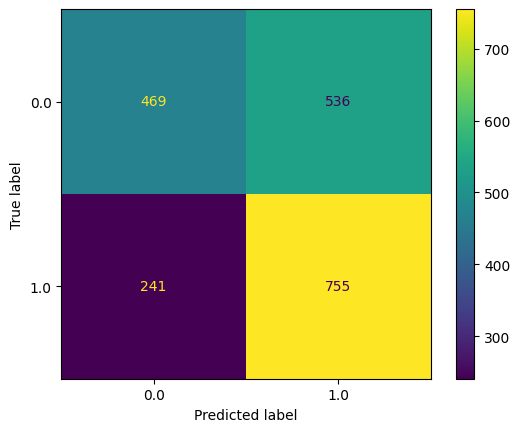

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.show()


In [22]:
accuracy_score(Y_test,Y_pred)

0.6116941529235382

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred_prob = grid_search.predict_proba(X_test)

Y_test_01 = pd.factorize(Y_test)[0].tolist()

fpr, tpr, thresholds = roc_curve(Y_test_01, Y_pred_prob[:,1]) 

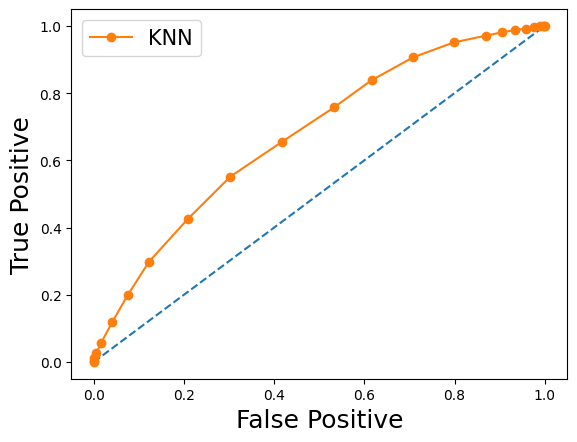

In [25]:
plt.plot([0,1], [0,1], '--')
plt.plot(fpr,tpr, 'o-', label='KNN')
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.legend(fontsize=15)
plt.show()

In [26]:
print(f'model 1 AUC score: {roc_auc_score(Y_test, Y_pred_prob[:,1])}') 

model 1 AUC score: 0.6755070031369257
